## 0.1 Importing visualisations libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.7.2'

In [4]:
#Creating a folder path

path = r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/'

In [5]:
path

'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/'

## 0.2 Import data

In [6]:
#Import combined happiness report

df_all = pd.read_csv(r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/Prepared Data/All_years_wrangled_yr_ct_combined.csv')

## 0.3 Data cleaning

In [7]:
df_all.head()

Country  Years Year country combined  Happiness Rank  Happiness Score  \
0  Switzerland   2015     Switzerland, 2015               1            7.587   
1      Iceland   2015         Iceland, 2015               2            7.561   
2      Denmark   2015         Denmark, 2015               3            7.527   
3       Norway   2015          Norway, 2015               4            7.522   
4       Canada   2015          Canada, 2015               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  
0                        0.41978     0.29678  
1                        0.14145     0.43630  
2                        0.48357     0.34139  
3                        0.36503     0.34699  
4                        0.32957     0.45811

In [8]:
df_all.shape

(782, 11)

In [9]:
df_all.columns

Index(['Country', 'Years', 'Year country combined', 'Happiness Rank',
       'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Years                          782 non-null    int64  
 2   Year country combined          782 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


In [13]:
#Check for missing values

df_all.isnull().sum()

Country                          0
Years                            0
Year country combined            0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

#### Only 1 missing value found, I already know this is United Arab Emirates, 2018 for Trust.

In [14]:
# Find duplicates

df_all_dups = df_all[df_all.duplicated()]

In [15]:
df_all_dups

Empty DataFrame
Columns: [Country, Years, Year country combined, Happiness Rank, Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
Index: []

#### No duplicates found

In [20]:
#Check mixed type data

for col in df_all.columns.tolist():
      weird = (df_all[[col]].map(type) != df_all[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_all[weird]) > 0:
        print (col)

## 0.4 Exploring Relationships

### Correlations

In [23]:
# Dropping unneeded columns and creating data subset
df_all_sub = df_all.drop(['Country', 'Years', 'Year country combined'], axis = 1)

In [24]:
# Creating correlation table between variables
df_all_sub.corr()

Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992066   
Happiness Score                     -0.992066         1.000000   
Economy (GDP per Capita)            -0.794791         0.789284   
Family                              -0.644842         0.648799   
Health (Life Expectancy)            -0.743655         0.742456   
Freedom                             -0.537942         0.551258   
Trust (Government Corruption)       -0.372781         0.398418   
Generosity                          -0.117713         0.137578   

                               Economy (GDP per Capita)    Family  \
Happiness Rank                                -0.794791 -0.644842   
Happiness Score                                0.789284  0.648799   
Economy (GDP per Capita)                       1.000000  0.585966   
Family                                         0.585966  1.000000   
Health (Life Expectancy)                       0.784338  0.572650   
Freedom                                        0.340511  0.420361   
Trust (Government Corruption)                  0.306307  0.126401   
Generosity                                    -0.014560 -0.037262   

                               Health (Life Expectancy)   Freedom  \
Happiness Rank                                -0.743655 -0.537942   
Happiness Score                                0.742456  0.551258   
Economy (GDP per Capita)                       0.784338  0.340511   
Family                                         0.572650  0.420361   
Health (Life Expectancy)                       1.000000  0.340745   
Freedom                                        0.340745  1.000000   
Trust (Government Corruption)                  0.250512  0.459593   
Generosity                                     0.010638  0.290706   

                               Trust (Government Corruption)  Generosity  
Happiness Rank                                     -0.372781   -0.117713  
Happiness Score                                     0.398418    0.137578  
Economy (GDP per Capita)                            0.306307   -0.014560  
Family                                              0.126401   -0.037262  
Health (Life Expectancy)                            0.250512    0.010638  
Freedom                                             0.459593    0.290706  
Trust (Government Corruption)                       1.000000    0.318920  
Generosity                                          0.318920    1.000000

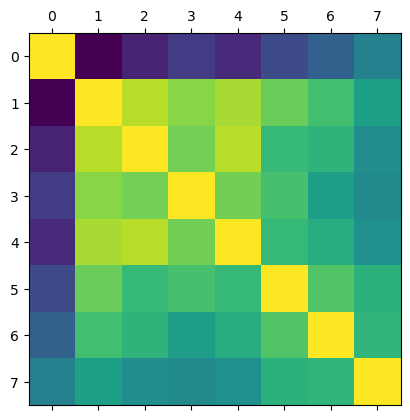

In [26]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_all_sub.corr())
plt.show()

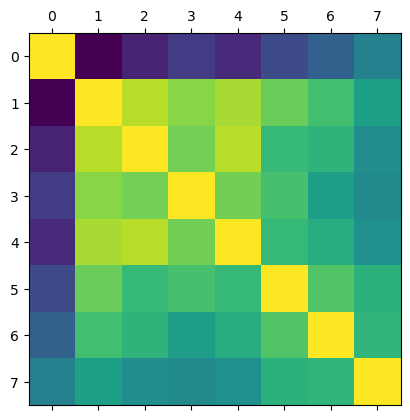

In [29]:
# Save figure
plt.matshow(df_all_sub.corr())
plt.savefig("first_matpltlib_correlation_df_all_sub.png") 

In [30]:
#current directory check
cwd = os.getcwd()
cwd

'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/Python files'

Text(0.5, 1.0, 'Correlation Matrix 1')

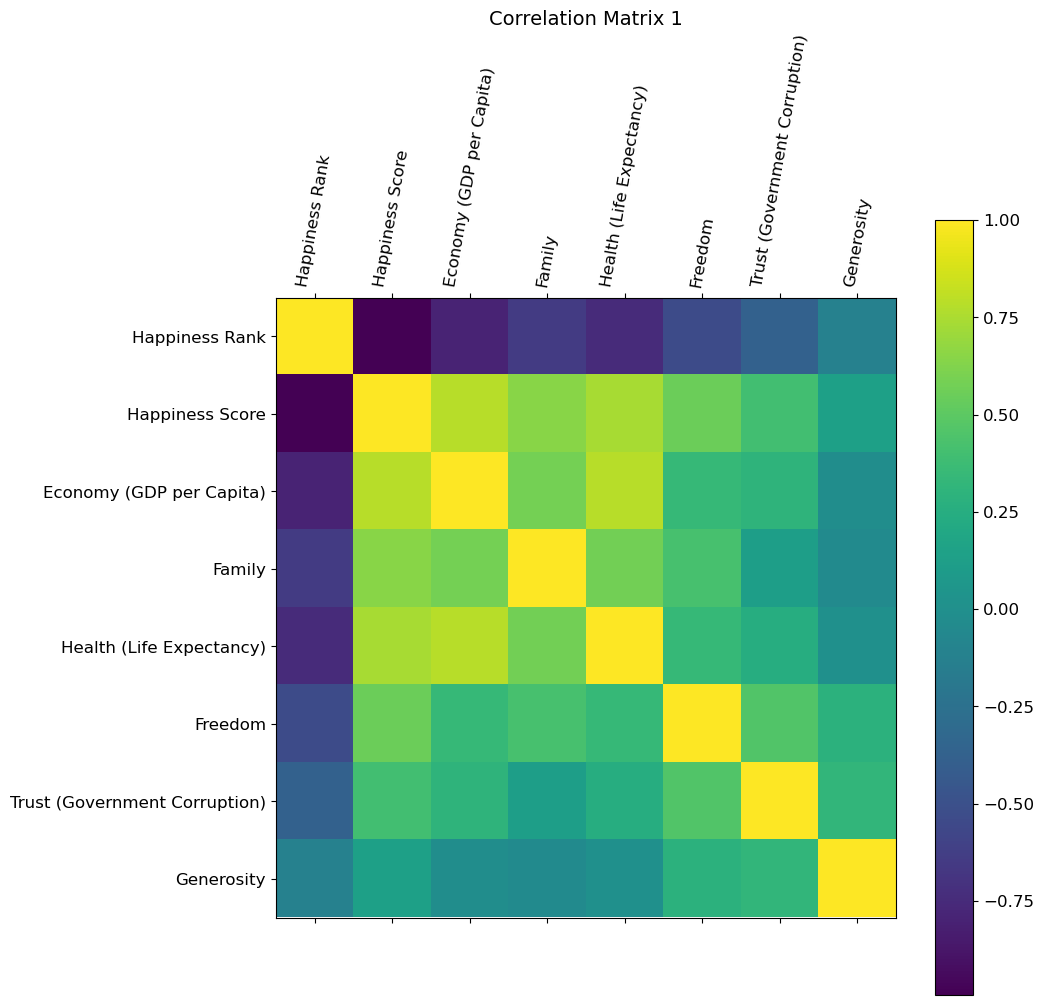

In [38]:
# Adding labels, a legend, and change the size of the heatmap from matplotlib

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_all_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_all_sub.shape[1]), df_all_sub.columns, fontsize=12, rotation=80) # x axis labels
plt.yticks(range(df_all_sub.shape[1]), df_all_sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix 1', fontsize=14) # add title

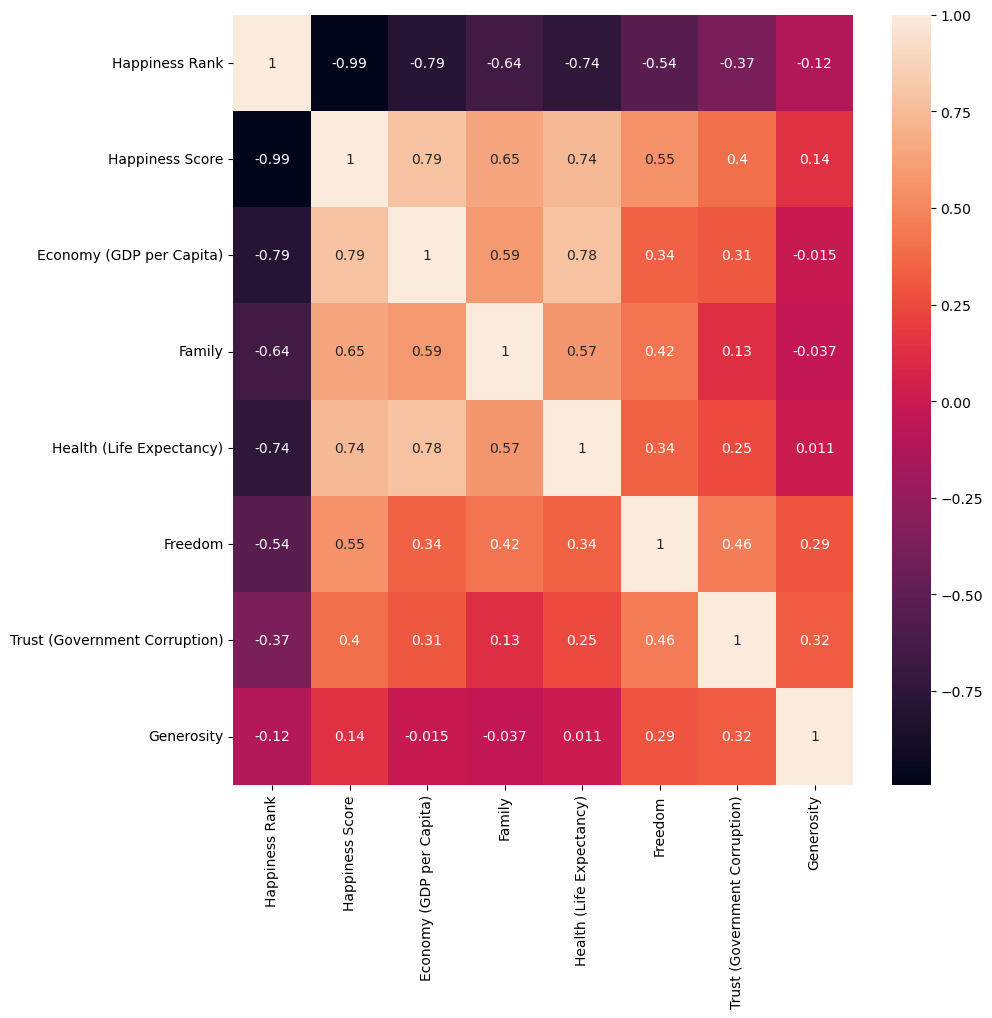

In [39]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_all_sub.corr(), annot = True, ax = ax)

# Q3 

#### From above (using the seaborn heatmap), the happiness rank and happiness score have an inverse correlation. Which checks out as the higher the happiness score, the lower (in number) the happiness rank, so 1 being the highest and vice versa. I can also see a strong positive correlation between a high happiness score and other variables such as: Economy, Family, Health, and Freedom. Whereas a weak correlation is shown between the happiness score and the variables Trust and Generosity.

### Scatterplots

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


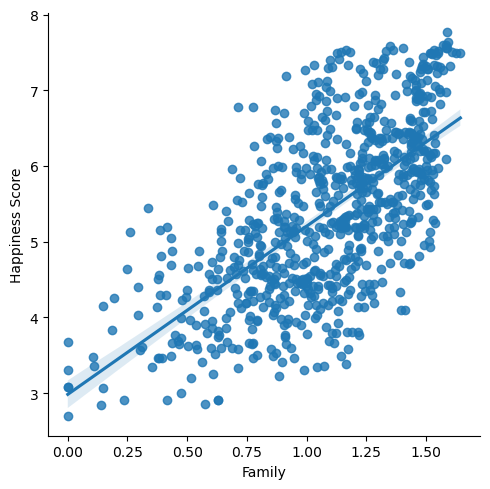

In [40]:
# Scatterplot of most correlated variables
# Family and happiness scatterplot
sns.lmplot(x = 'Family', y = 'Happiness Score', data = df_all)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


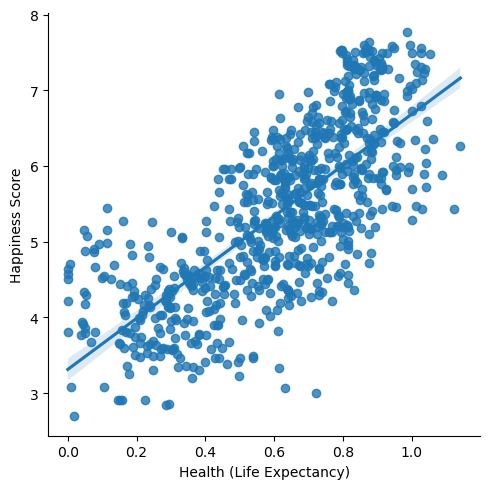

In [41]:
# Scatterplot of most correlated variables
# Health and happiness scatterplot
sns.lmplot(x = 'Health (Life Expectancy)', y = 'Happiness Score', data = df_all)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


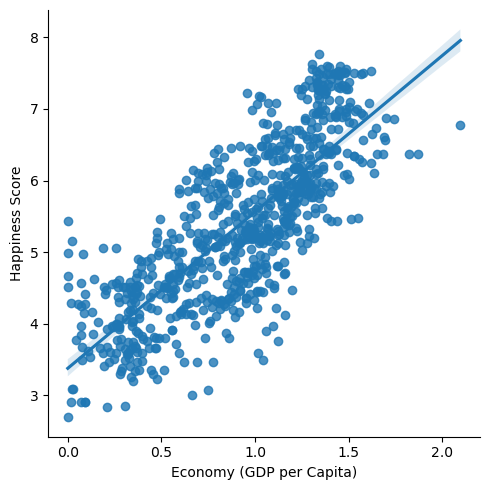

In [42]:
# Scatterplot of most correlated variables
# EconomyGDP per capita and happiness scatterplot
sns.lmplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df_all)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


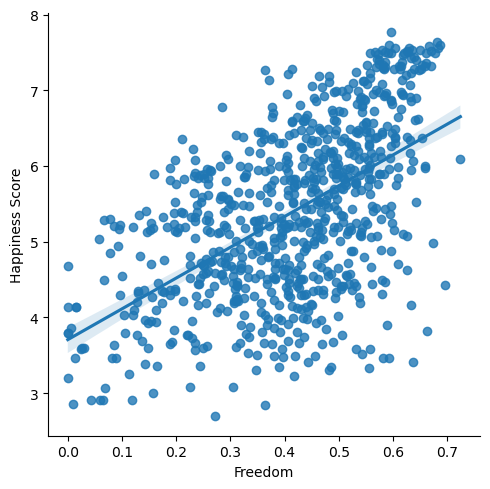

In [43]:
# Scatterplot of most correlated variables
# EconomyGDP per capita and happiness scatterplot
sns.lmplot(x = 'Freedom', y = 'Happiness Score', data = df_all)

# Q.4 

#### The scatterplots above all dispay strong positive correlations, while some are tighter to the trendline than others.

### Pair Plots

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

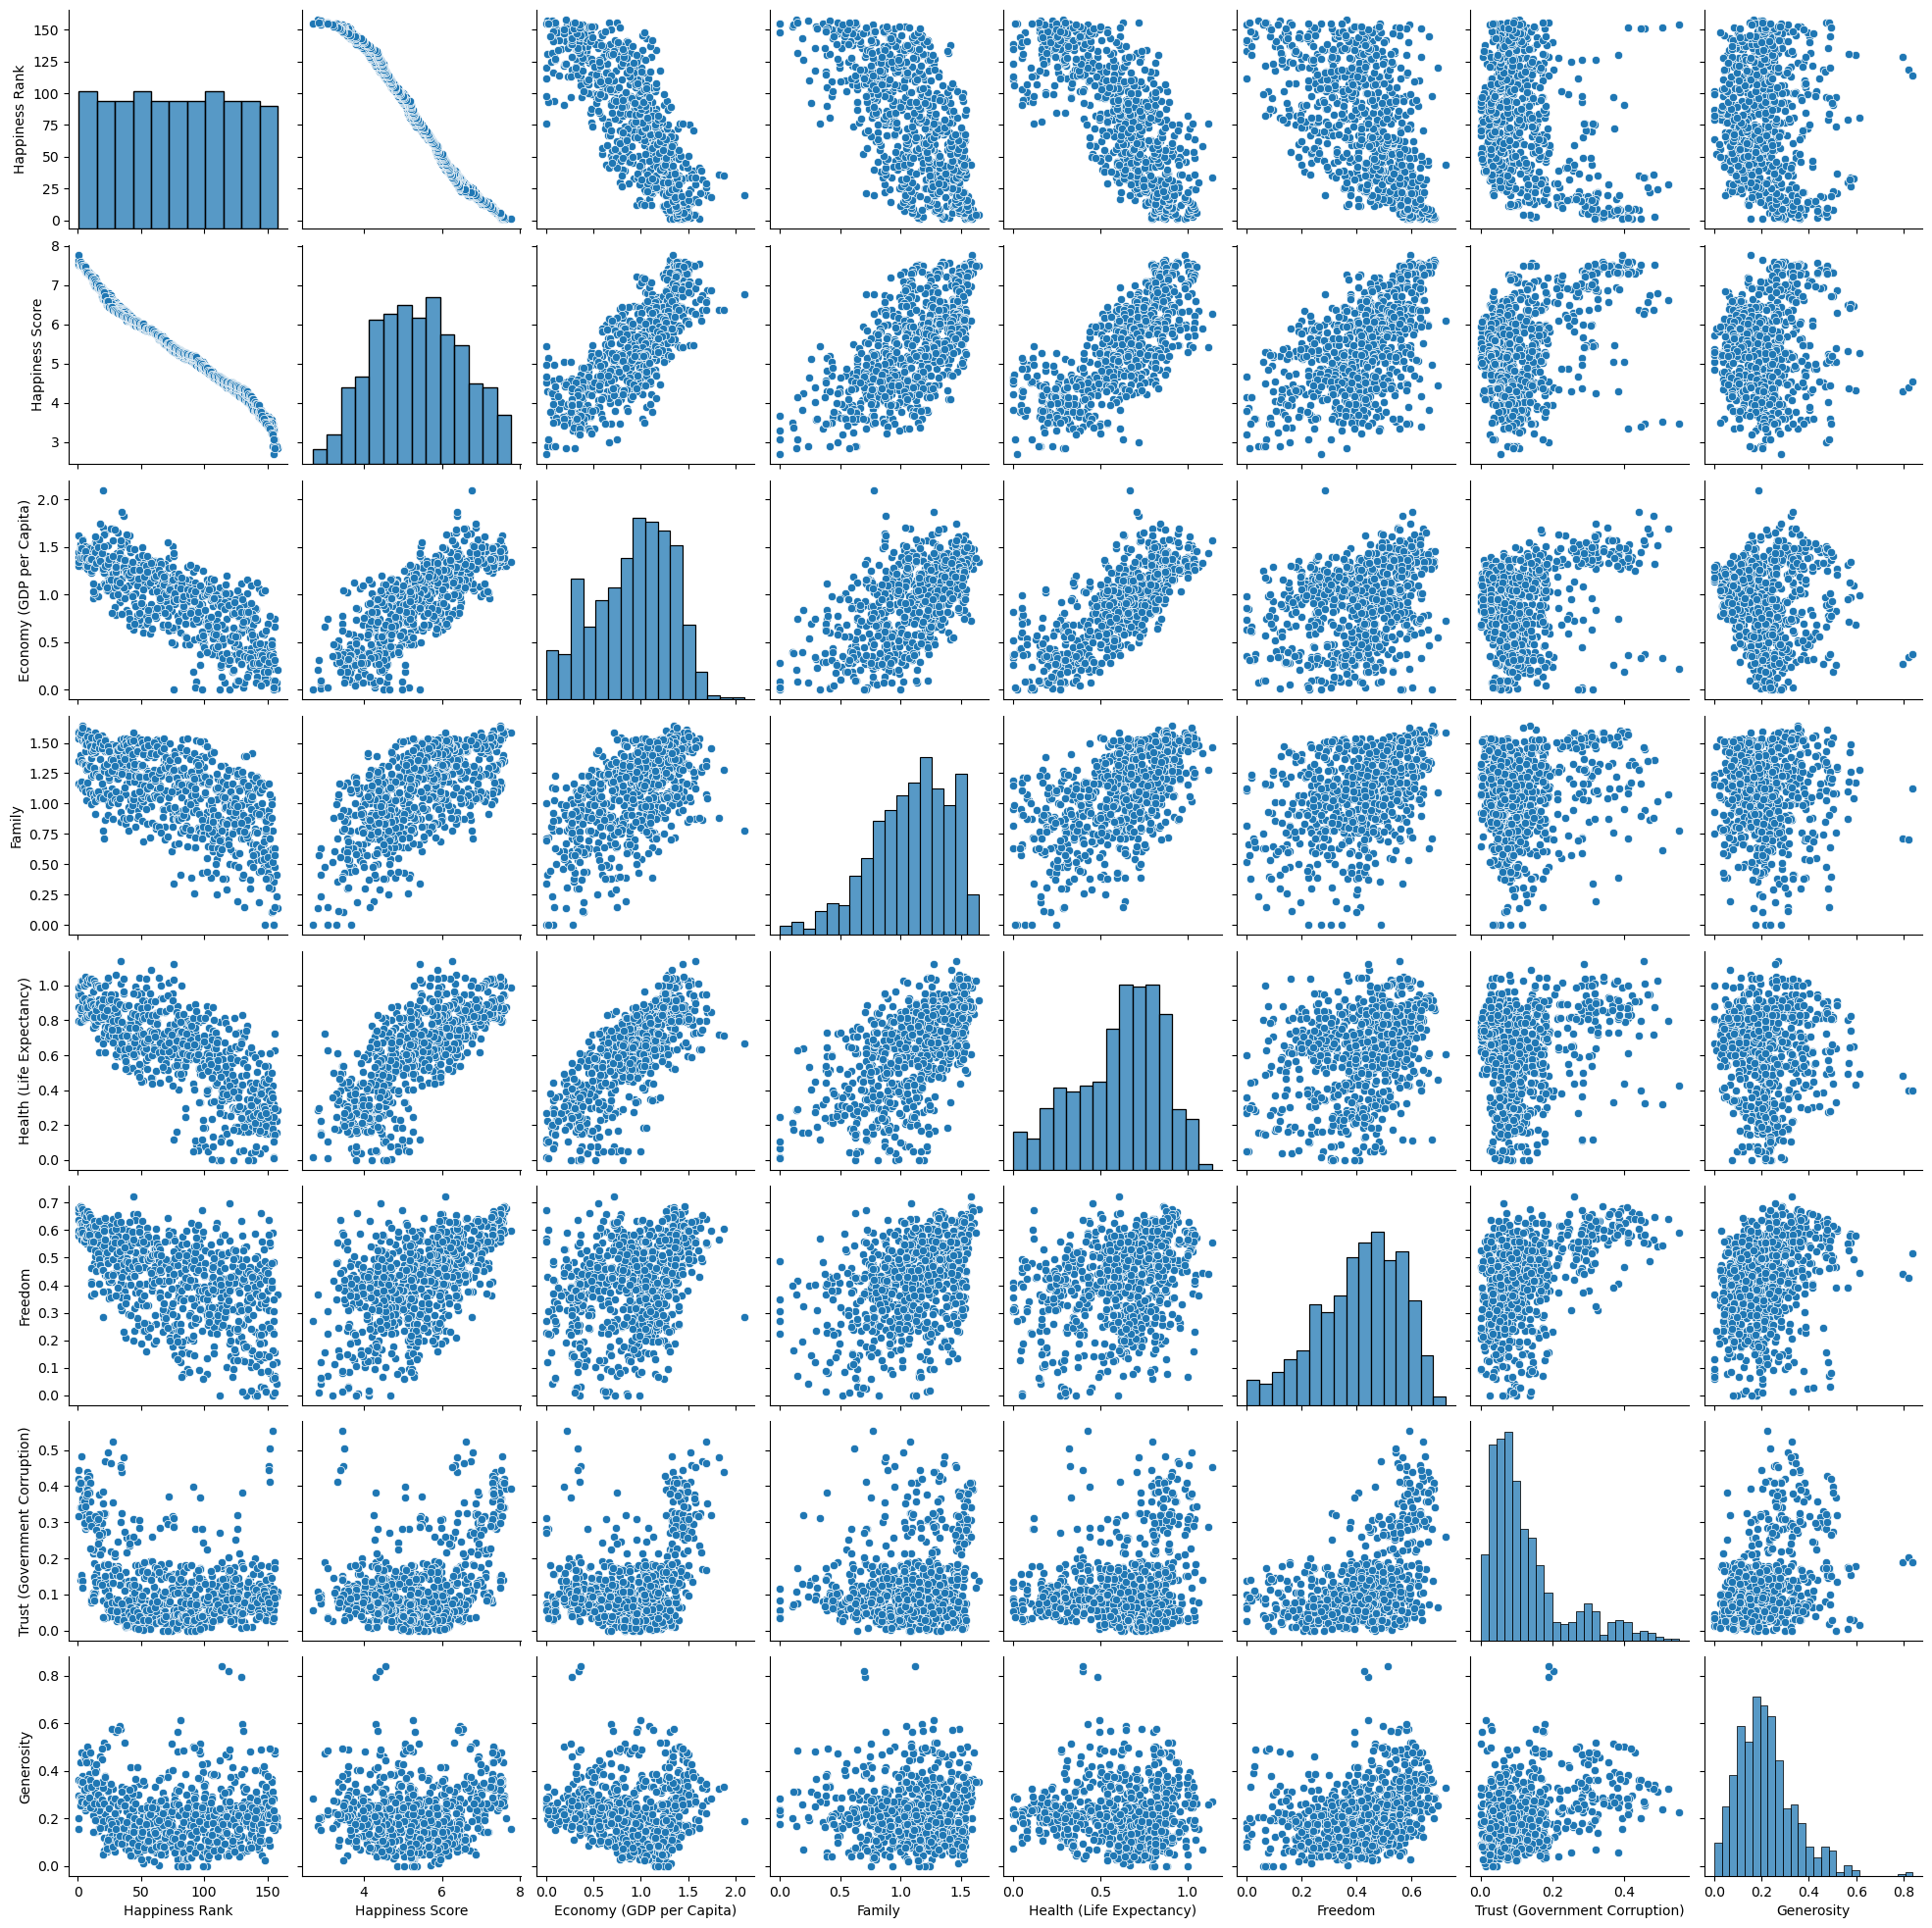

In [44]:
# Creating a pairplot
pair_plot = sns.pairplot(df_all_sub)

In [45]:
# Creating smaller subsection to see just strongest variables

df_all_sub_strong_corr = df_all.drop(['Country', 'Years', 'Generosity', 'Trust (Government Corruption)'], axis = 1)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

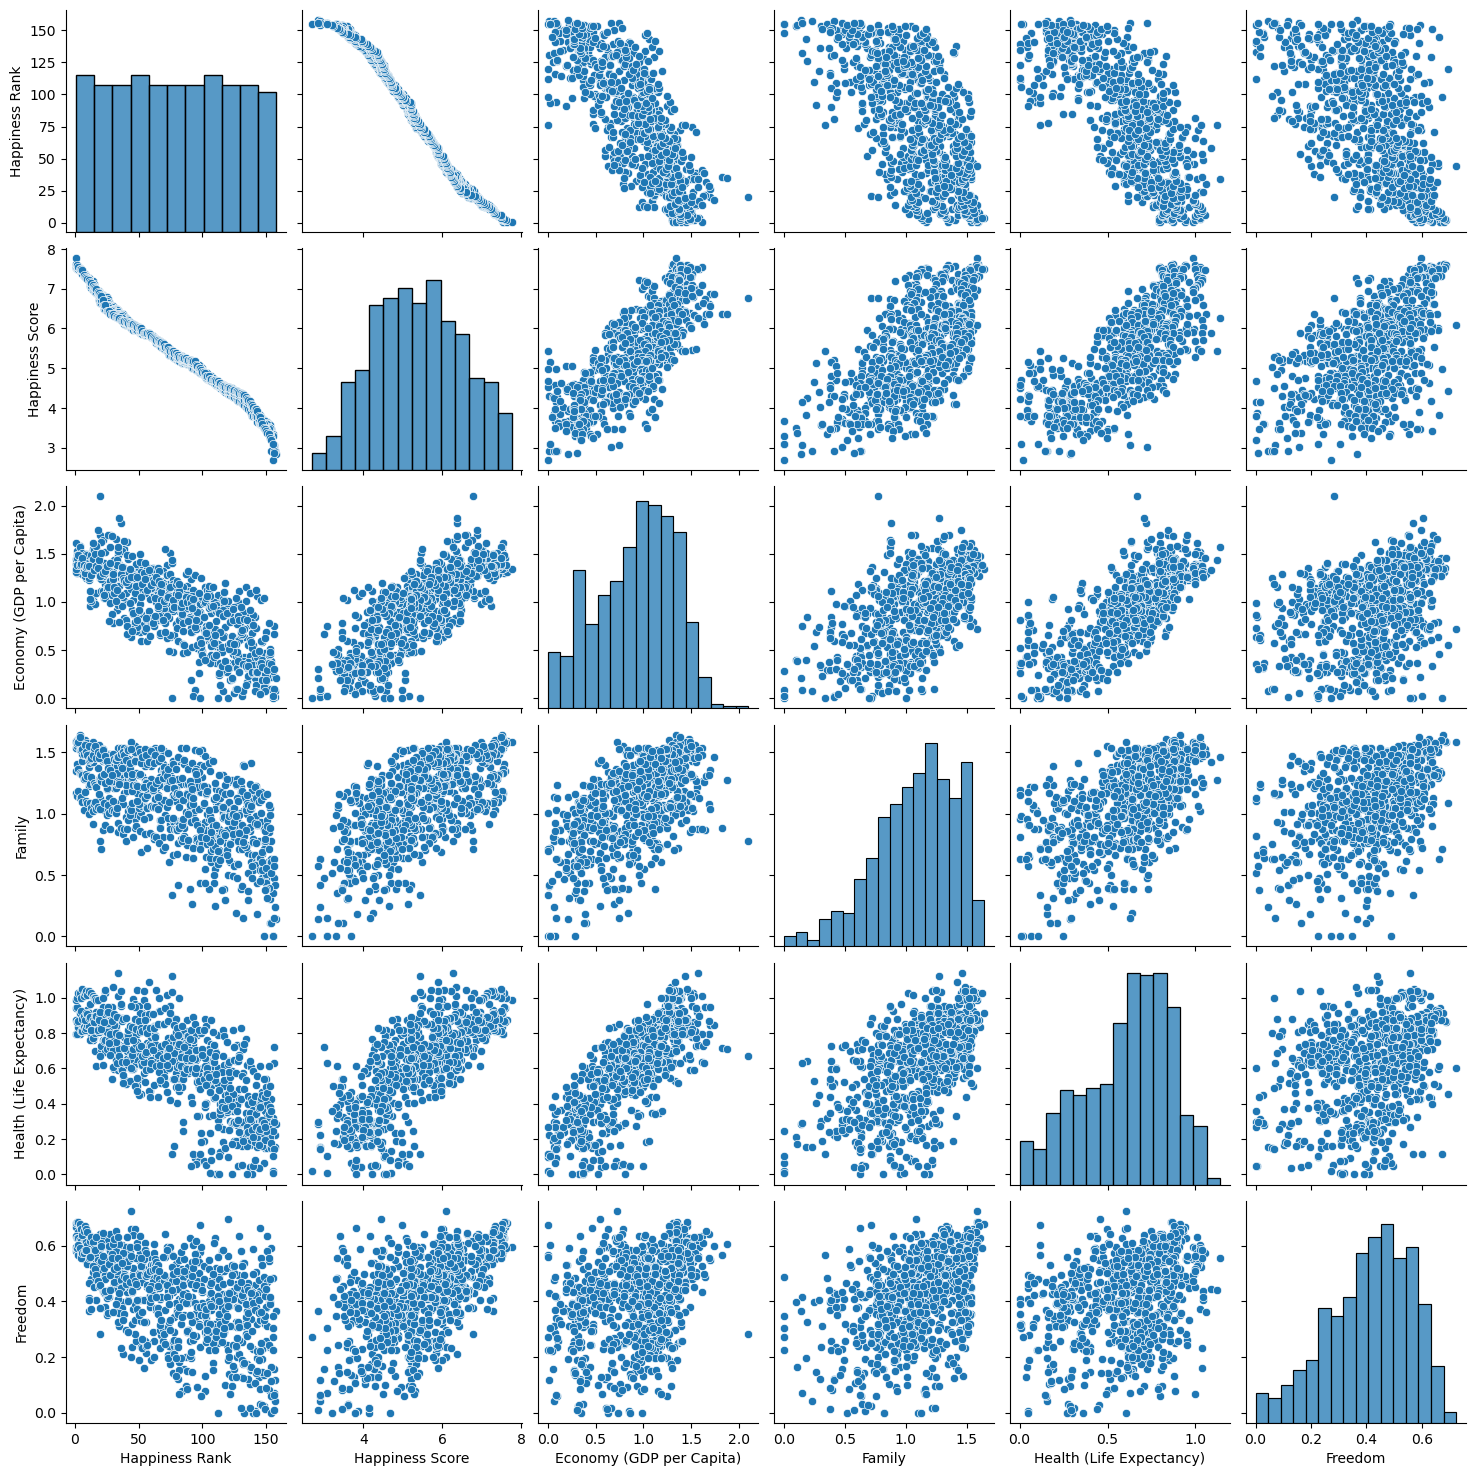

In [46]:
pair_plot_strong = sns.pairplot(df_all_sub_strong_corr)

In [47]:
#Creating subset for weakly correlated variables

df_all_sub_weak_corr = df_all.drop(['Country', 'Years', 'Family', 'Economy (GDP per Capita)', 'Health (Life Expectancy)'], axis = 1)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

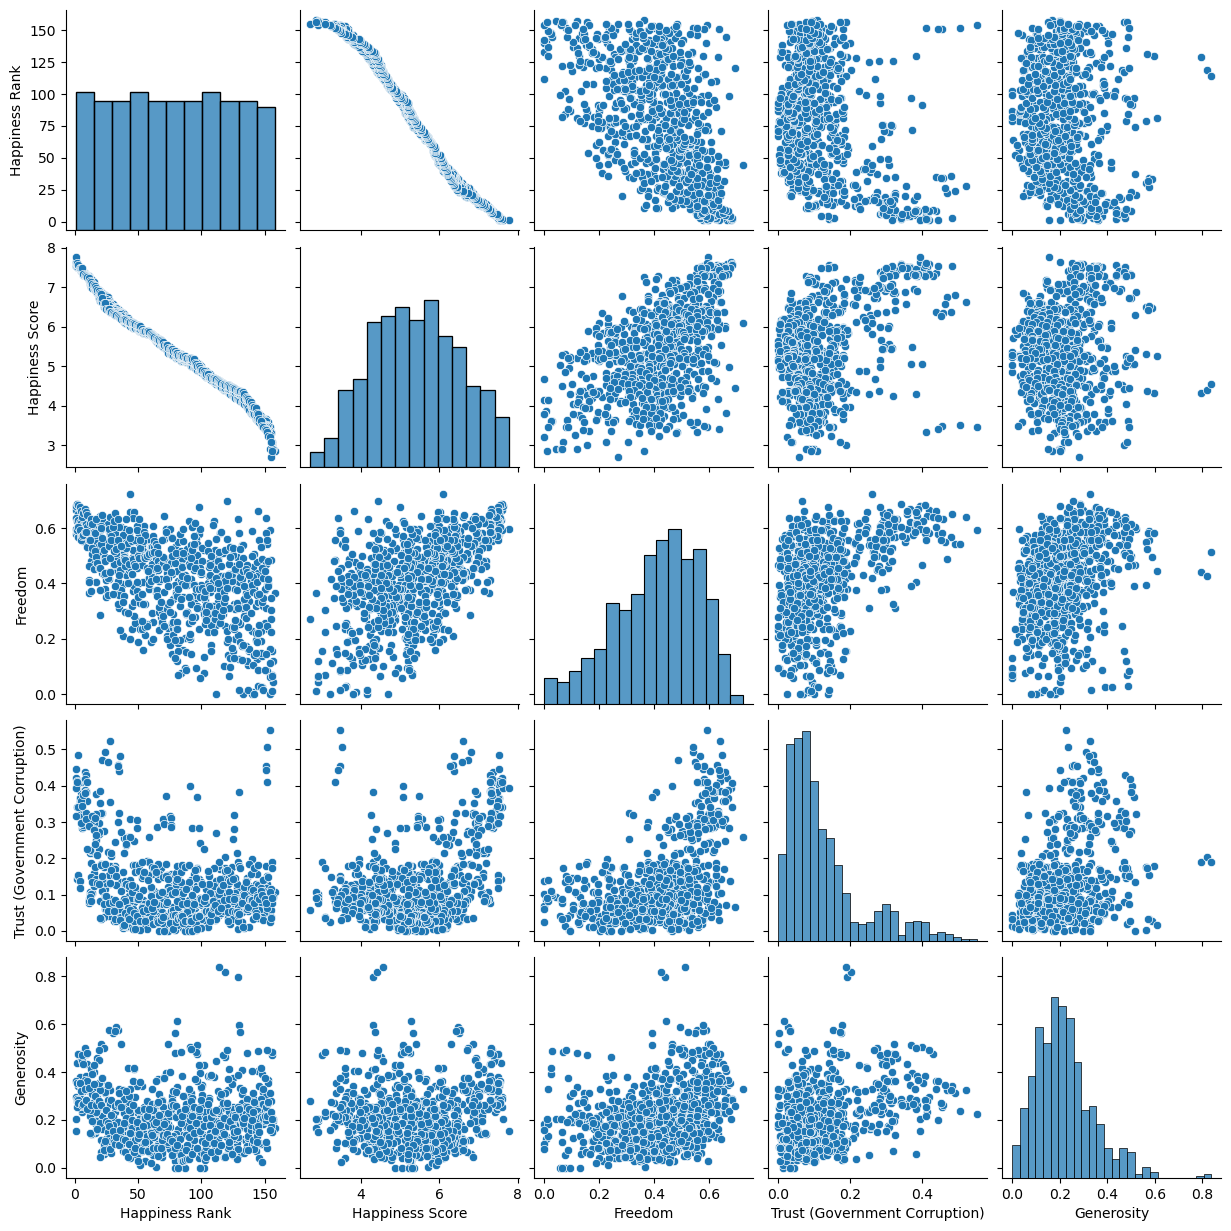

In [48]:
pair_plot_weak = sns.pairplot(df_all_sub_weak_corr)

# Q.5

#### The strongly correlated pair plots look how I expected: they show strong correlations between all variables that were analysed and confirmed what was shown in the heatmap. The interesting results were the weak correlations, these are what I would like to investigate more, for example, the variables that we weakly correlated with a country's happiness Score , eg. Generosity and Trust.

### Categorical Plots

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Count'>

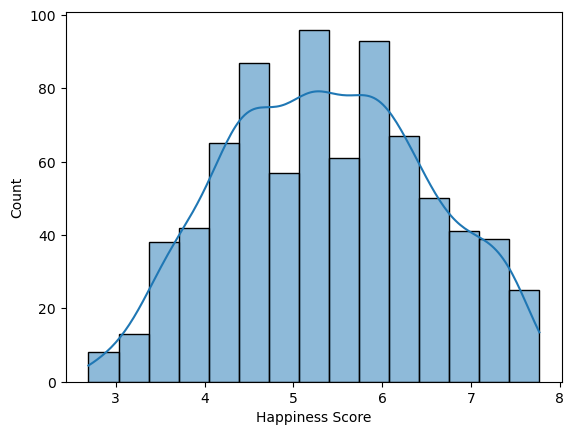

In [49]:
# Use a histogram to visualize the distribution of the variables & determine sensible categories 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Happiness Score'], bins = 15, kde = True)

In [51]:
#Create a (happiness) score category for categorical plot

df_all.loc[df_all['Happiness Score'] < 4.0 , 'Score category'] = 'Low score'

In [53]:
df_all.loc[(df_all['Happiness Score'] >= 4.0) & (df_all['Happiness Score'] < 6), 'Score category'] = 'Middle score'

In [55]:
df_all.loc[df_all['Happiness Score'] >= 6, 'Score category'] = 'High score'

In [56]:
#Check the Score Category

df_all['Score category'].value_counts(dropna = False)

Score category
Middle score    451
High score      235
Low score        96
Name: count, dtype: int64

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


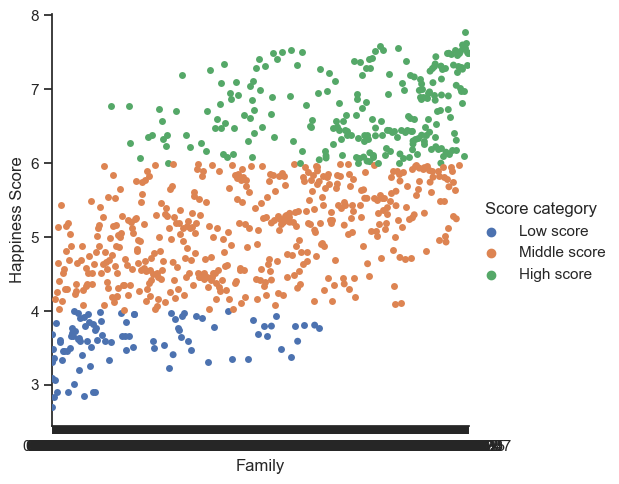

In [62]:
# Creating categorical plot with Family

sns.set(style="ticks")
cat_plot_family = sns.catplot(x='Family', y='Happiness Score', hue="Score category", data=df_all)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


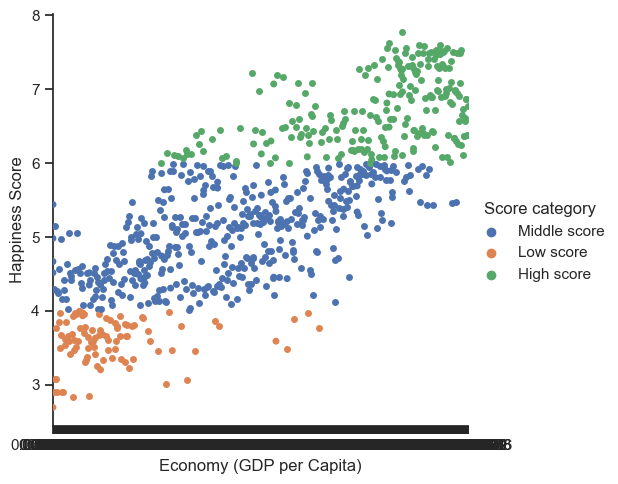

In [63]:
# Creating categorical plot with Economy

sns.set(style="ticks")
cat_plot_Economy = sns.catplot(x='Economy (GDP per Capita)', y='Happiness Score', hue="Score category", data=df_all)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


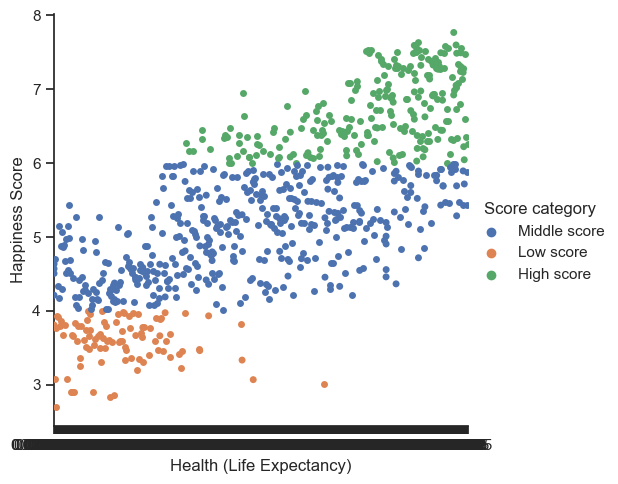

In [64]:
# Creating categorical plot with Health

sns.set(style="ticks")
cat_plot_health = sns.catplot(x='Health (Life Expectancy)', y='Happiness Score', hue="Score category", data=df_all)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


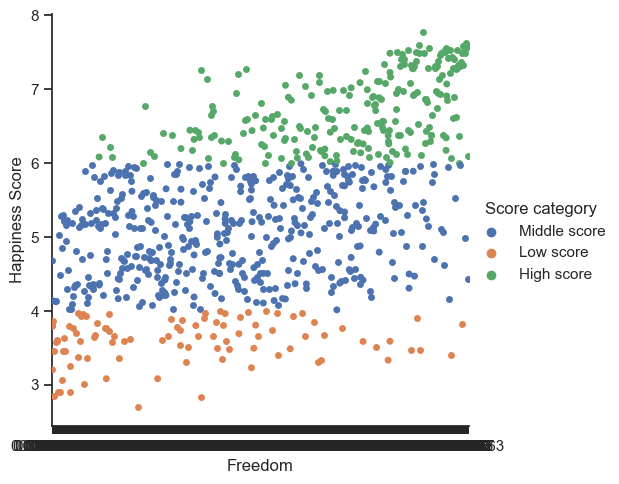

In [65]:
# Creating categorical plot with Freedom

sns.set(style="ticks")
cat_plot_freedom = sns.catplot(x='Freedom', y='Happiness Score', hue="Score category", data=df_all)

In [66]:
# fig = cat_plot_freedom.get_figure()
cat_plot_freedom.savefig("cat_plot_freedom.png") 

In [67]:
# fig = cat_plot_family.get_figure()
cat_plot_family.savefig("cat_plot_family.png") 

In [68]:
# fig = cat_plot_health.get_figure()
cat_plot_health.savefig("cat_plot_health.png") 

In [70]:
# fig = cat_plot_Economy.get_figure()
cat_plot_Economy.savefig("cat_plot_Economy.png") 

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


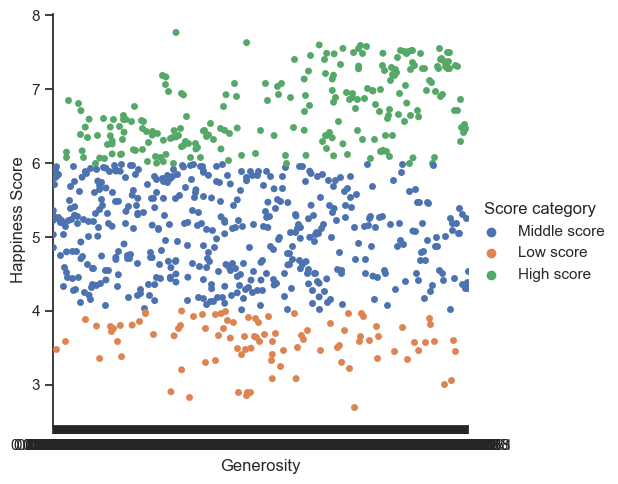

In [71]:
# Creating categorical plot with Generosity

sns.set(style="ticks")
cat_plot_generosity = sns.catplot(x='Generosity', y='Happiness Score', hue="Score category", data=df_all)

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


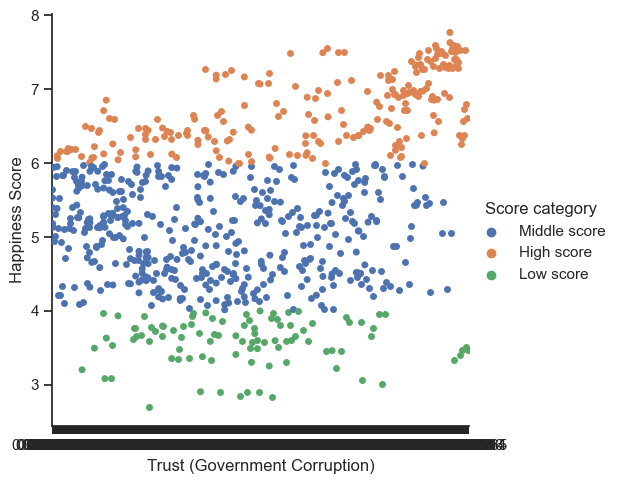

In [72]:
# Creating categorical plot with Trust

sns.set(style="ticks")
cat_plot_trust = sns.catplot(x='Trust (Government Corruption)', y='Happiness Score', hue="Score category", data=df_all)

In [73]:
# fig = cat_plot_trust.get_figure()
cat_plot_trust.savefig("cat_plot_trust.png") 

In [74]:
# fig = cat_plot_generosity.get_figure()
cat_plot_generosity.savefig("cat_plot_generosity.png") 

# Q.6

#### I created the categorical plots above with the different variables against a Happiness Score to compare.  While non show a definitive line or trend between the happiness scores that I categorised, I do see a trend more in Health and Economy. I also do not spot any real outliers in this data set across any of the variables.

# Q.7

#### From my findings in this task, I can see that Economy (GDP per Capita), Family, and Health (life Expectancy) are the variables that contribute the most to a country's happiness score. Conversely, I was also able to see that Freedom, Trust (Government Corruption), and Generosity contributed the least to a country's happiness score - or negatively. Therefore, question I would like to focus on for this achievemnt from my previous task is a broader question combining a few: How do each of the variables contribute to each country's Happiness Score?
#### During this task, I have not yet answered questions on what countries are happiest/ least happy and what changes we have seen. As I have been focusing on correlation. This is something I would like to explore more further down the line

# Q.8

#### Hypothesis - There is a positive correlation between a country's level of social support (as measured by the Family, Health and Economy) and its overall Happiness Score.
#### Null Hypothesis: If a country has a high GDP per capita and high life expectancy, but a low family score, then the country will not have a high happiness score.
#### Hypothesis - Happiness Scores for each country measured between 2015 and 2019 does not change within more than 10 places (in rank).
#### Null Hypothesis - Happiness Scores over 2015-2019 for specific countries vary greatly in terms of rank.